In [82]:
import numpy as np
import pandas as pd
import spikeextractors as se
import spiketoolkit as st
import spikewidgets as sw

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from utils import *

```
np.array(get_trange('2021-02-11_07-00-18_OR179_3_136_U223_morning', 'Or179_44238.36510326_2_11_10_8_30.wav',offset=datetime.timedelta(minutes=6)))
```

Data retrieval and organization

In [3]:
# OE data path
rec_dir = r'D:\D_Zs_Tetx\2021-02-11_07-00-18_OR179_3_136_U223_morning'
data_path = r'D:\D_Zs_Tetx\2021-02-11_07-00-18_OR179_3_136_U223_morning\Record Node 101\experiment1\recording1\continuous\Rhythm_FPGA-100.0\continuous.dat'

# Whole recording
recording = se.BinDatRecordingExtractor(
    data_path,
    30000,
    24,
    dtype='int16',
)

# Get only the ADC channels
adc_recording = se.SubRecordingExtractor(
    recording,
    channel_ids=[*range(recording.get_num_channels()-8,recording.get_num_channels())]
)
# Get only the microphones
mic_recording = se.SubRecordingExtractor(
    adc_recording,
    channel_ids=[16,17]
)

# Filter out hum from mic
mic_recording=st.preprocessing.bandpass_filter(mic_recording,freq_min=900, freq_max=15000)

# Wav file paths
wav_paths = [
    r'D:/D_Zs_Tetx/2021-02-11_07-00-18_OR179_3_136_U223_morning_wavs/Or179_44238.36510326_2_11_10_8_30.wav',
    r'D:/D_Zs_Tetx/2021-02-11_07-00-18_OR179_3_136_U223_morning_wavs/Or179_44238.36642152_2_11_10_10_42.wav'
]

# Numpy recording extractors
wav_recordings = [get_wav_recording(wav_path) for wav_path in wav_paths]

3 hr * 3600 + 14 min * 60

In [91]:
chanmap=np.array([[3, 7, 11, 15],[2, 4, 10, 14],[4, 8, 12, 16],[1, 5, 9, 13]])

C:\Users\danpo\anaconda3\lib\site-packages\spikewidgets\widgets\spectrumwidget\spectrumwidget.py:179: UserWarning: FixedFormatter should only be used together with FixedLocator
  self.ax.set_xticklabels(np.linspace(self._trange[0], self._trange[1], l_xticks))


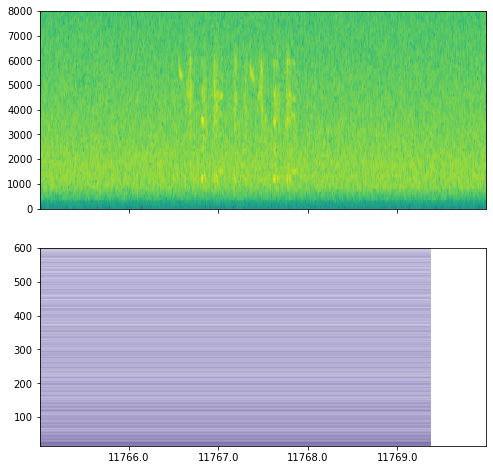

In [3]:
# sw.plot_timeseries(recording, [16], trange=firstrange, figure=fig)
trange=[11765,11770]
fig, axes=plt.subplots(2,1,figsize=[8,8], sharex=True)
sw.plot_spectrogram(mic_recording, 16, trange=trange, freqrange=[0,8000], ax=axes[0])
sw.plot_spectrogram(recording, 3,  trange=trange, freqrange=[15,600],   nfft=256*2**9, ax=axes[1], cmap="PuOr")

## Tuning the offset to be used for these two computers

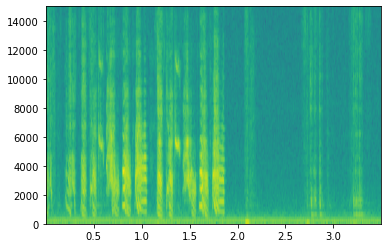

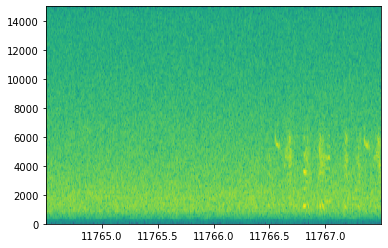

In [5]:
# [sw.plot_spectrogram(wav_recording, channel=0, freqrange=[0,15000], trange=[0,3.5]) for wav_recording in wav_recordings]
trange=get_trange(rec_dir, wav_paths[1], offset=datetime.timedelta(minutes=5, seconds=42), duration=3)

sw.plot_spectrogram(wav_recordings[1], channel=0, freqrange=[0,15000], trange=[0,3.5])
sw.plot_spectrogram(
    mic_recording,
    16,
    trange=trange,
    freqrange=[0,15000],
)

In [153]:
# trange=[11735,11790]
def explore_1(wav_path):
    trange=get_trange(rec_dir, wav_path, offset=datetime.timedelta(minutes=5, seconds=43), duration=5)

    # Plot wav
#     sw.plot_spectrogram(wav_recordings[1], channel=0, freqrange=[0,15000], trange=[0,3.5])

    # Make axes
    fig, axes=plt.subplots(2,1,figsize=[8,8])
    
    # Plot microphone spectrogram
    sw.plot_spectrogram(mic_recording, 16, trange=trange, freqrange=[0,8000], ax=axes[0])
    axes[0].set_ylabel('Hz')
    
    # Plot microphone 
    sw.plot_timeseries(recording, [*range(1,8)], trange=trange, ax=axes[1])
    for line in axes[1].lines:
        line.set_linewidth(0.5)
        
    axes[1].set_ylabel('$\mu V$')
    
    # Remove all ticks
    for ax in axes:
        ax.axis('off')

C:\Users\danpo\anaconda3\lib\site-packages\spikewidgets\widgets\spectrumwidget\spectrumwidget.py:179: UserWarning: FixedFormatter should only be used together with FixedLocator
  self.ax.set_xticklabels(np.linspace(self._trange[0], self._trange[1], l_xticks))


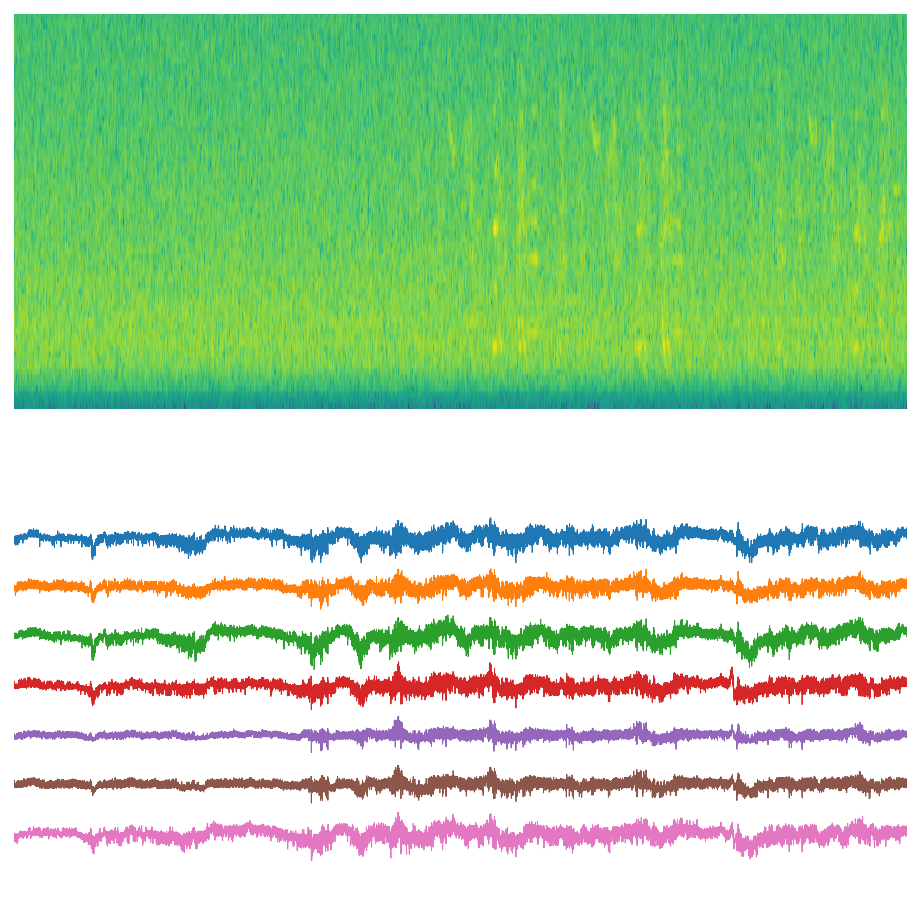

In [154]:
explore_1(wav_paths[0])

C:\Users\danpo\anaconda3\lib\site-packages\spikewidgets\widgets\spectrumwidget\spectrumwidget.py:179: UserWarning: FixedFormatter should only be used together with FixedLocator
  self.ax.set_xticklabels(np.linspace(self._trange[0], self._trange[1], l_xticks))


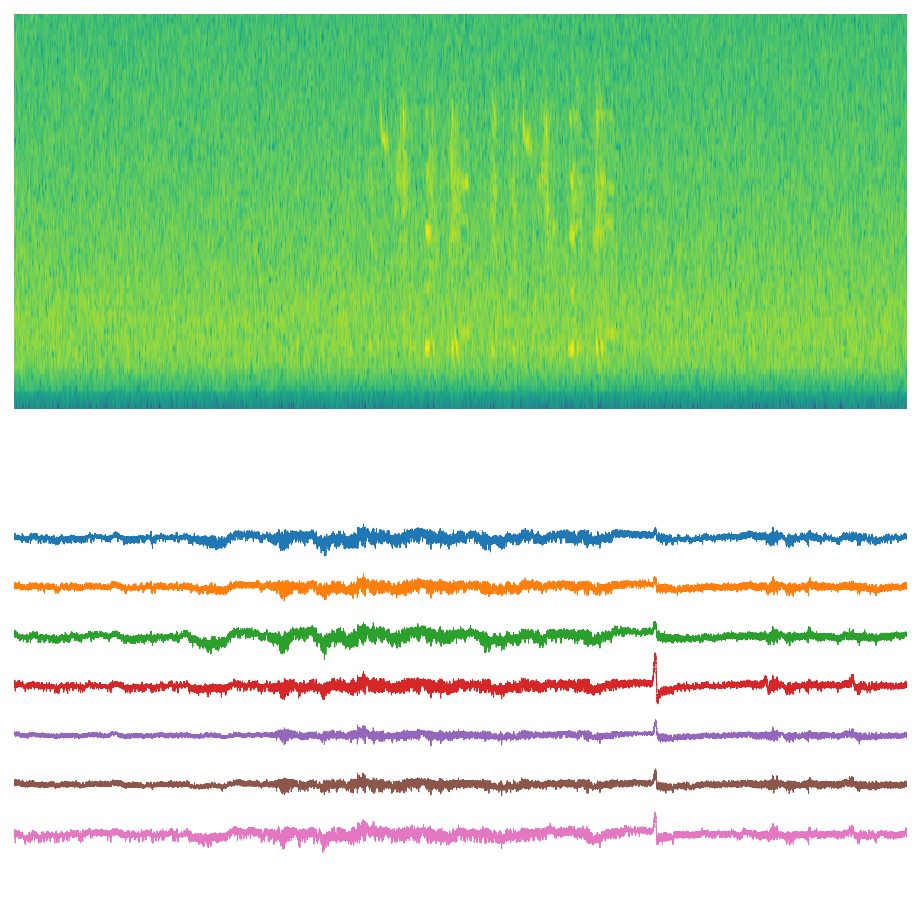

In [155]:
explore_1(wav_paths[1])

TODO:
- Implement mean-subtracted version (add as option)

In [159]:
def explore_2(wav_path):
    trange=get_trange(rec_dir, wav_path, offset=datetime.timedelta(minutes=5, seconds=43), duration=20)

    # Plot wav
#     sw.plot_spectrogram(wav_recordings[1], channel=0, freqrange=[0,15000], trange=[0,3.5])

    # Plot microphone spectrogram
    fig,axes=plt.subplots(1,4,figsize=[16,2])
    for ax in axes:
        sw.plot_spectrogram(mic_recording, 16, trange=trange, freqrange=[0,8000], ax=ax) 
        ax.axis('off')    
    
    # Make axes
    fig, axes=plt.subplots(4,4,figsize=[16,8])
    
    
    # Plot LFP
    for i in range(4):
        for j in range(4):
            ax = axes[i][j]
            sw.plot_spectrogram(recording, chanmap[i][j],  trange=trange, freqrange=[0,130], nfft=256*2**4, ax=ax, cmap='magma')
            ax.axis('off')
            # Set channel as title
            ax.set_title(chanmap[i][j])

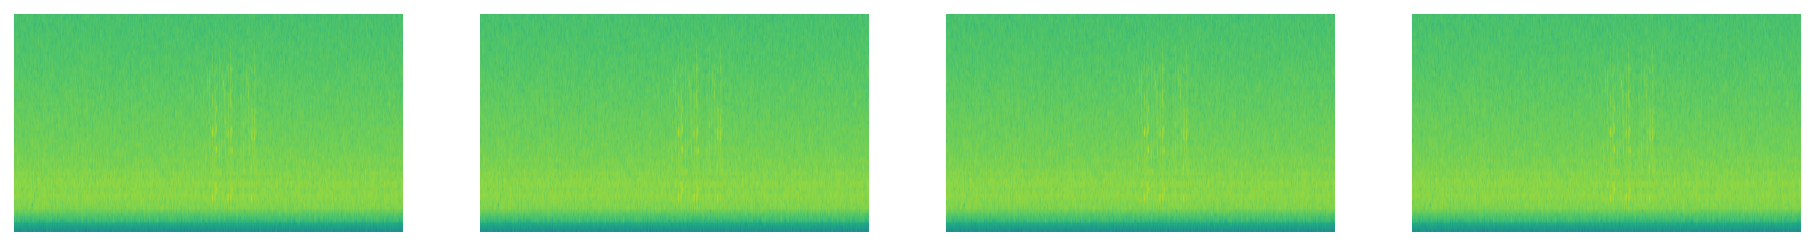

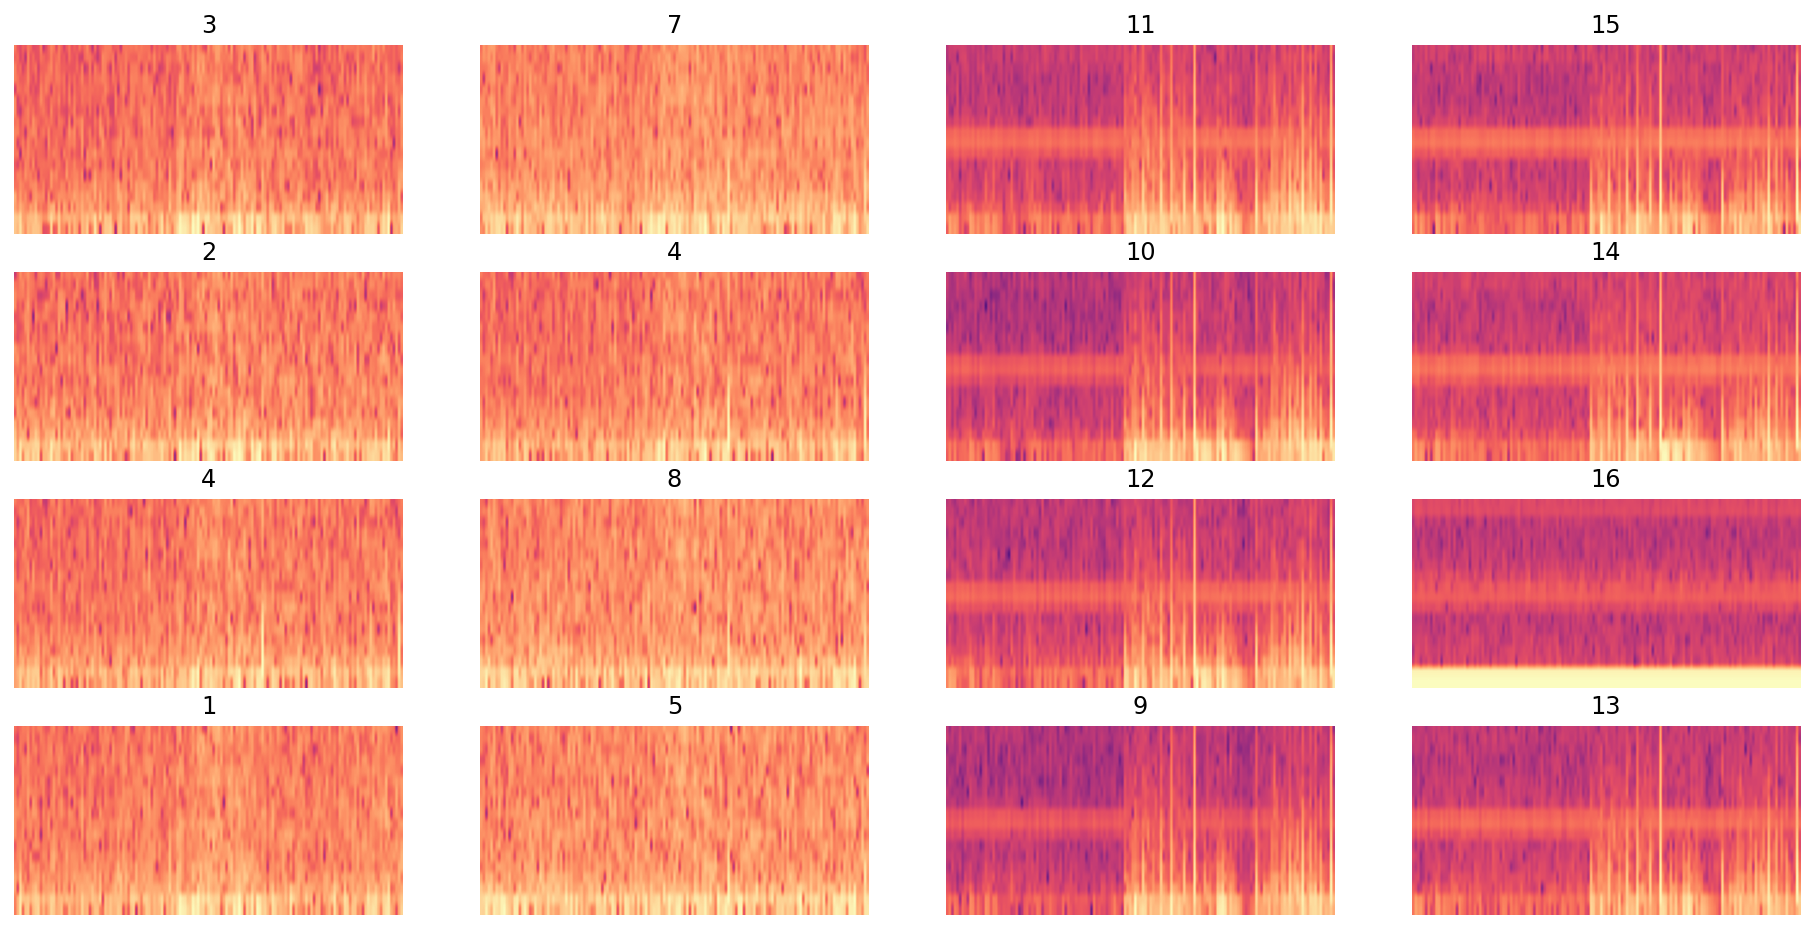

In [160]:
explore_2(wav_paths[0])

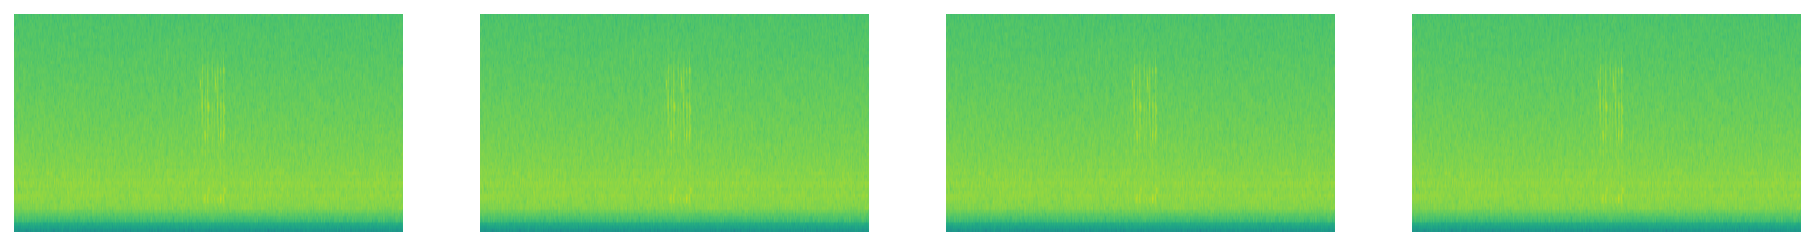

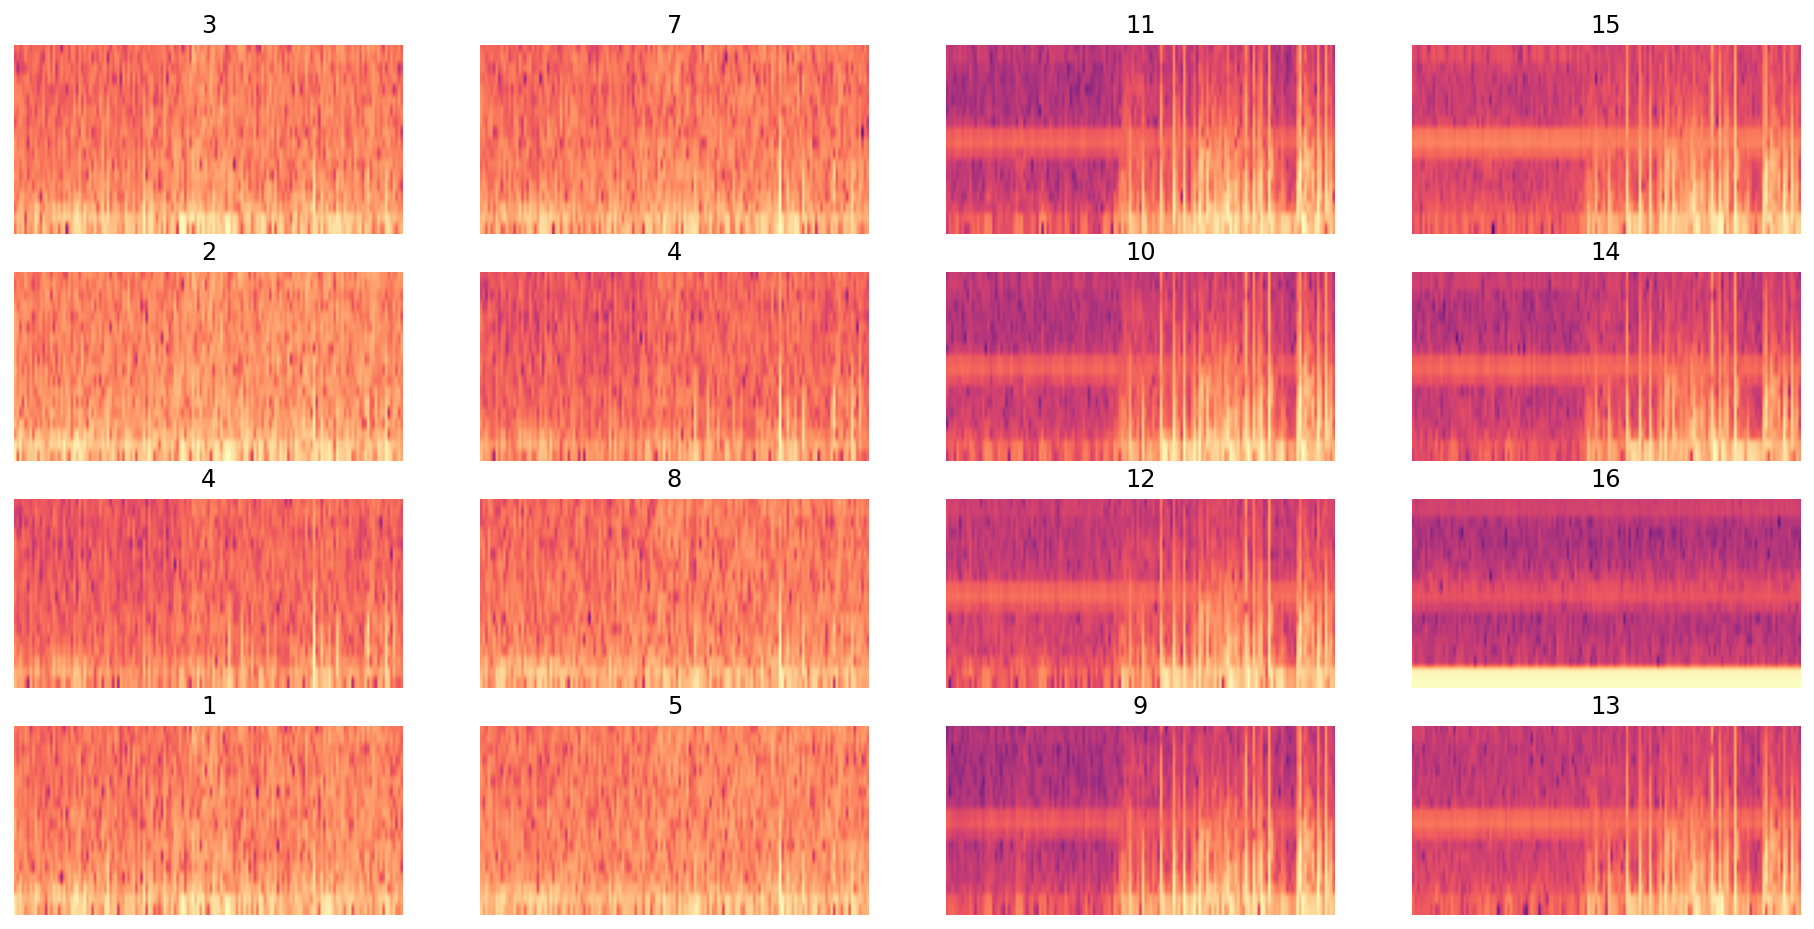

In [161]:
explore_2(wav_paths[1])